In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
with open('data.txt','r') as f:
    data = f.read().split()
i = 0
plt_x = []
plt_y = []
plt_ros_x = []
plt_ros_y = []
plt_f = []
plt_r = []
plt_ros_f = []
plt_ros_r = []
plt_t = []
end = len(data)%9
t0 = float(data[0])
while i < (len(data)-end):
    plt_t.append(float(data[i])-t0)
    plt_x.append(float(data[i+1]))
    plt_y.append(float(data[i+2]))
    plt_ros_x.append(float(data[i+3]))
    plt_ros_y.append(float(data[i+4]))
    plt_f.append(float(data[i+5]))
    plt_r.append(float(data[i+6]))
    plt_ros_f.append(float(data[i+7]))
    plt_ros_r.append(float(data[i+8]))
    i = i + 9


In [45]:
print(plt_t)

[0.0, 1.5800001621246338, 2.9800000190734863, 4.340000152587891, 5.730000019073486, 7.180000066757202, 8.620000123977661, 10.040000200271606, 11.420000076293945, 12.769999980926514, 14.180000066757202, 15.580000162124634, 16.94000005722046, 18.40000009536743, 19.790000200271606, 21.19000005722046, 22.550000190734863, 23.930000066757202, 25.290000200271606, 26.65000009536743, 28.040000200271606, 29.390000104904175, 30.820000171661377, 32.200000047683716, 33.63000011444092, 35.00999999046326, 36.420000076293945, 37.81000018119812, 39.25, 40.640000104904175, 42.05000019073486, 43.52999997138977, 44.88000011444092, 46.25999999046326, 47.75999999046326, 49.19000005722046, 50.610000133514404, 52.040000200271606, 53.38000011444092, 54.769999980926514]


Text(0,0.5,u'Joint Angle (in degrees)')

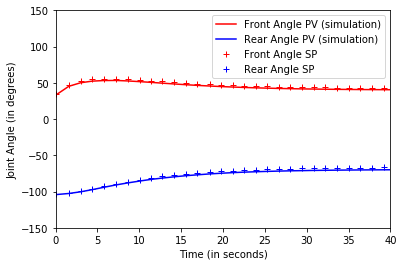

In [46]:
fig, ax = plt.subplots()
ax.set_xlim([0,40])
ax.set_ylim([-150,150])
ax.plot(plt_t,plt_ros_f,'r',plt_t,plt_ros_r,'b',
    plt_t,plt_f,'r+',plt_t,plt_r,'b+')
ax.legend(['Front Angle PV (simulation)','Rear Angle PV (simulation)', 'Front Angle SP', 'Rear Angle SP'])              
ax.set_xlabel('Time (in seconds)')
ax.set_ylabel('Joint Angle (in degrees)')

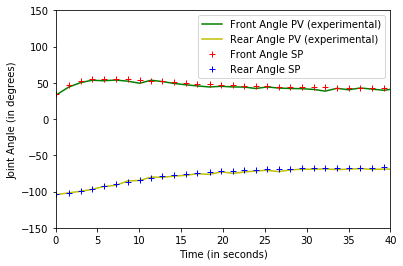

In [47]:
fig, ax = plt.subplots()
noise_f = np.random.normal(0.2,1,len(plt_ros_f))
plt_hw_f = plt_ros_f+noise_f
noise_r = np.random.normal(0.5,1,len(plt_ros_f))
plt_hw_r = plt_ros_r+noise_r
ax.set_xlim([0,40])
ax.set_ylim([-150,150])
ax.plot(plt_t,plt_hw_f,'g',plt_t,plt_hw_r,'y',#plt_t,plt_ros_f,'r',plt_t,plt_ros_r,'b',
    plt_t,plt_f,'r+',plt_t,plt_r,'b+')
ax.legend(['Front Angle PV (experimental)','Rear Angle PV (experimental)','Front Angle SP', 'Rear Angle SP'])              
ax.set_xlabel('Time (in seconds)')
ax.set_ylabel('Joint Angle (in degrees)')
plt.show()

Text(0,0.5,u'Y coordinate(in m)')

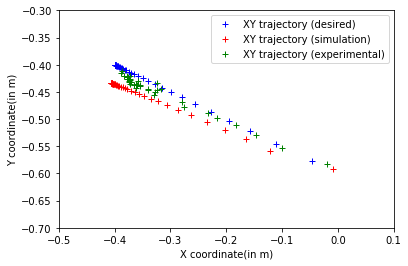

In [48]:
f_length = 0.3035
r_length = 0.3035

def direct_kinematics(fwd_angle, rear_angle, fwd_link_length, rear_link_length):
    fwd_angle = np.deg2rad(fwd_angle)
    rear_angle = np.deg2rad(rear_angle)
    return [rear_link_length*np.cos(rear_angle)+fwd_link_length*np.cos(fwd_angle+rear_angle), rear_link_length*np.sin(rear_angle)+fwd_link_length*np.sin(fwd_angle+rear_angle)]

hw_xy = direct_kinematics(plt_hw_f,plt_hw_r,f_length,r_length)
fig, ax = plt.subplots()
ax.set_xlim([-0.5,0.1])
ax.set_ylim([-0.7,-0.3])
ax.plot(plt_x,plt_y,'b+',plt_ros_x,plt_ros_y,'r+',-hw_xy[0],hw_xy[1],'g+')
ax.legend(['XY trajectory (desired)','XY trajectory (simulation)','XY trajectory (experimental)'])
ax.set_xlabel('X coordinate(in m)')
ax.set_ylabel('Y coordinate(in m)')

Text(0,0.5,u'Distance from origin (in m)')

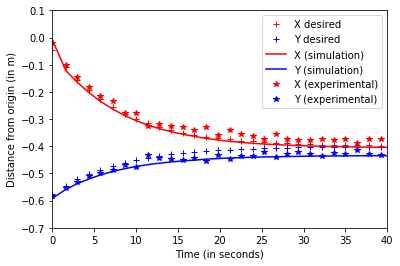

In [49]:
fig, ax = plt.subplots()
ax.set_xlim([0,40])
ax.set_ylim([-0.7,0.1])
ax.plot(plt_t,plt_x,'r+',plt_t,plt_y,'b+',plt_t,plt_ros_x,'r',plt_t,plt_ros_y,'b',plt_t,-hw_xy[0],'r*',plt_t,hw_xy[1],'b*')
ax.legend(['X desired','Y desired','X (simulation)','Y (simulation)','X (experimental)','Y (experimental)',])
ax.set_xlabel('Time (in seconds)')
ax.set_ylabel('Distance from origin (in m)')